In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\LG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('Gold_data.csv')
data

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [4]:
data.shape

(2182, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [6]:
data.describe(include='all')

,date,price
count,2182,2182.000000
unique,2182,NaN
top,2016-01-01,NaN
freq,1,NaN
mean,NaN,3284.450046
std,NaN,719.564434
min,NaN,2252.600000
25%,NaN,2697.020000
50%,NaN,2879.800000
75%,NaN,4147.325000


In [7]:
data[data['price']==2252.6]

,date,price
0,2016-01-01,2252.6


In [8]:
data[data['price']==4966.3]

,date,price
1620,2020-06-08,4966.3


In [9]:
data['date'] = pd.to_datetime(data['date'])
data

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [10]:
data.dtypes

date     datetime64[ns]
price           float64
dtype: object

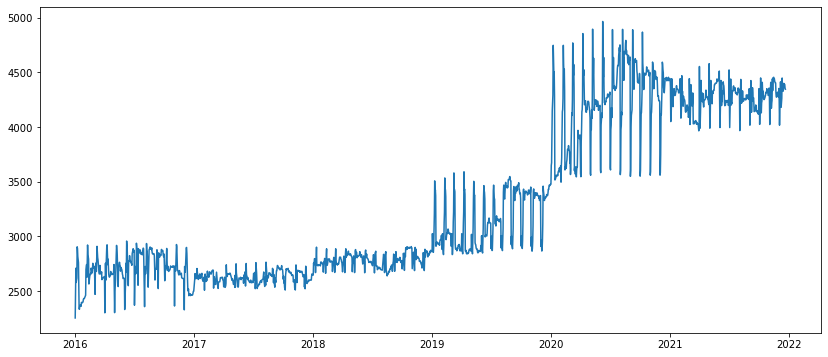

In [11]:
plt.figure(figsize=(14,6))
plt.plot(data['date'],data['price'])
plt.show()

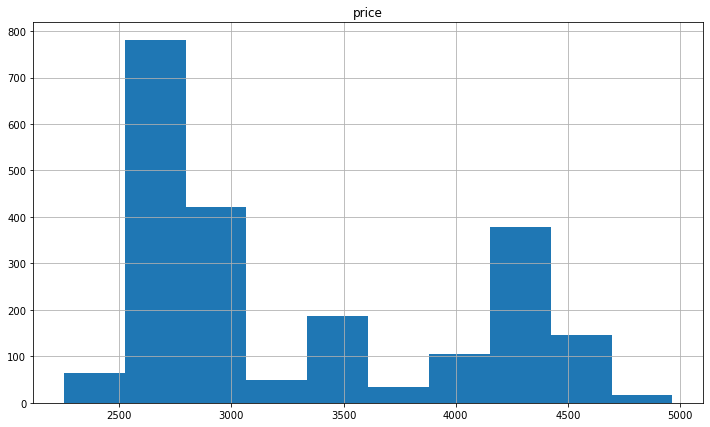

In [12]:
data.hist(column=['price'],figsize=(12,7))
plt.show()

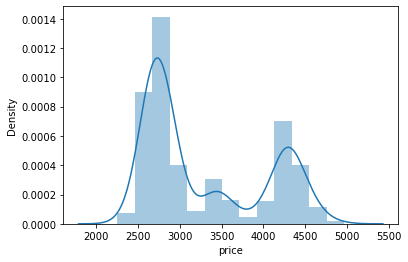

In [13]:
sns.distplot(data['price'])
plt.show()

In [14]:
data.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [15]:
data['Date'] = data.date.dt.strftime('%d')
data['Month'] = data.date.dt.strftime('%b')
data['Year'] = pd.DatetimeIndex(data['date']).year
data

,date,price,Date,Month,Year
0,2016-01-01,2252.60,01,Jan,2016
1,2016-01-02,2454.50,02,Jan,2016
2,2016-01-03,2708.10,03,Jan,2016
3,2016-01-04,2577.80,04,Jan,2016
4,2016-01-05,2597.75,05,Jan,2016
...,...,...,...,...,...
2177,2021-12-17,4394.40,17,Dec,2021
2178,2021-12-18,4389.50,18,Dec,2021
2179,2021-12-19,4389.50,19,Dec,2021
2180,2021-12-20,4354.10,20,Dec,2021


In [16]:
data.dtypes

date     datetime64[ns]
price           float64
Date             object
Month            object
Year              int64
dtype: object

### Heat map to check average price at each month for every year

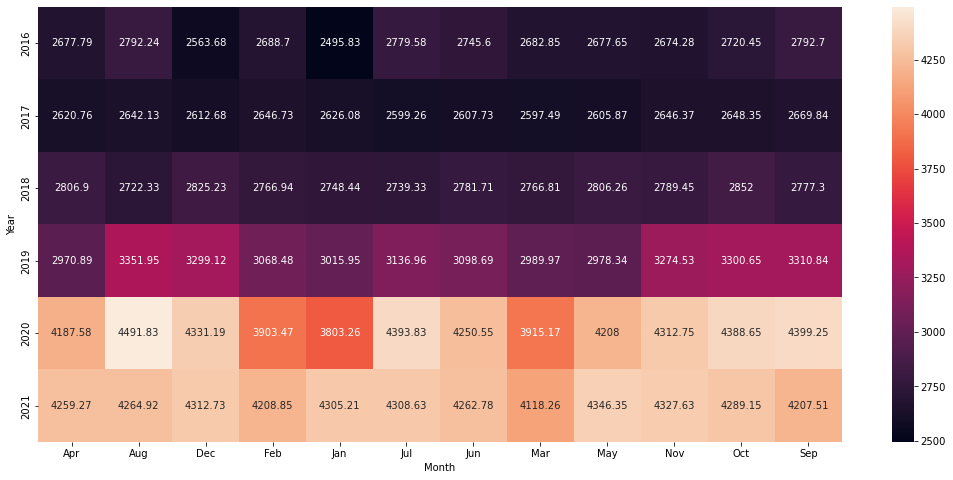

In [17]:
plt.figure(figsize=(18,8))
heatmap_y_month = pd.pivot_table(data=data,values="price",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

### Here we can see that in august 2020 the gold price was at peak and in january 2016 gold price was minimum.

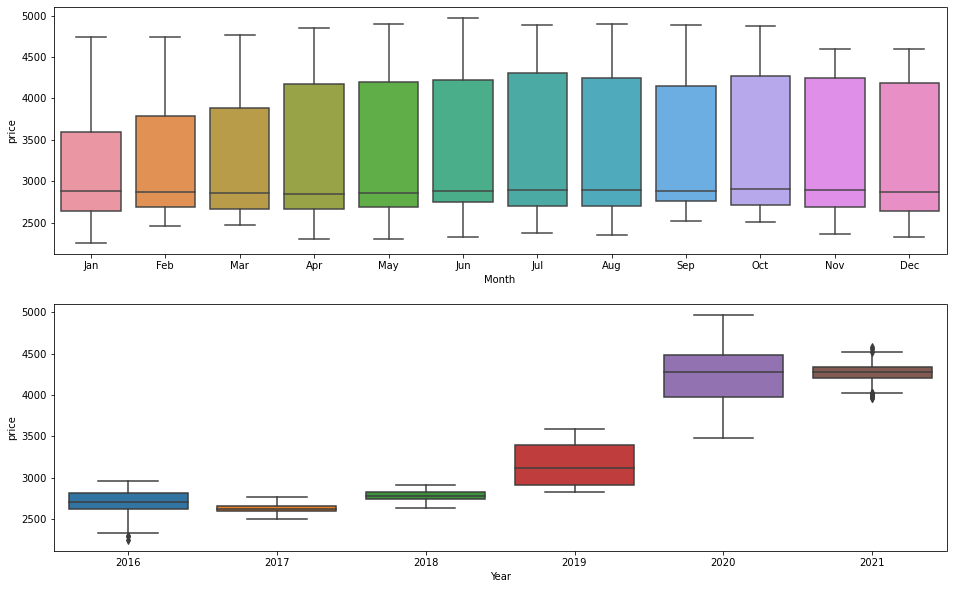

In [18]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
sns.boxplot(x='Month',y='price',data=data)
plt.subplot(2,1,2)
sns.boxplot(x='Year',y='price',data=data)
plt.show()

### From box plot we can see that some outlayers are present in the year 2016 and 2021

### we can also see from the box plot that the range in price was more in year 2019 and 2020 compare to other years

### Plotting for 2016 and 2021 to know how exactly price distribution is

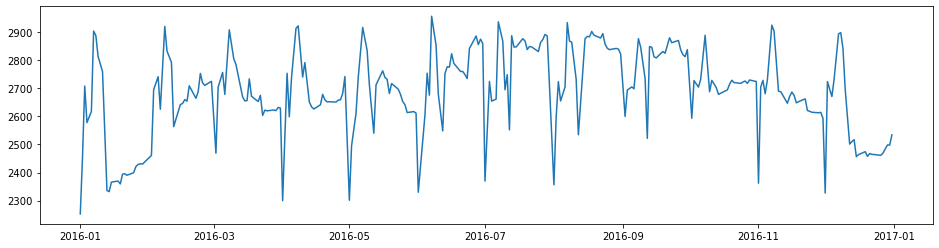

In [19]:
data_2016 = data[data['Year']==2016]
plt.figure(figsize=(16,4))
plt.plot(data_2016['date'],data_2016['price'])
plt.show()

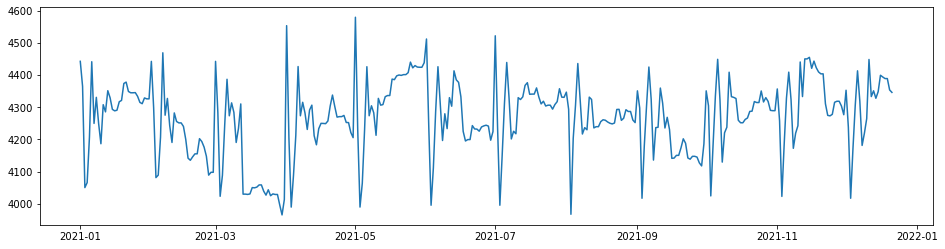

In [20]:
data_2021 = data[data['Year']==2021]
plt.figure(figsize=(16,4))
plt.plot(data_2021['date'],data_2021['price'])
plt.show()

### From above plot we can say that there is huge drop or rise in the prices

### Checking for trend and seasonality

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

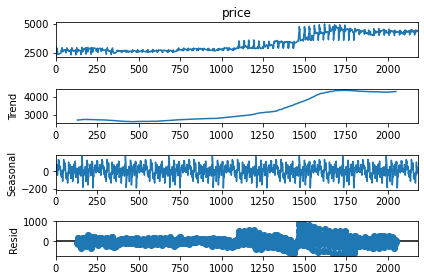

In [22]:
decompose_ts_add = seasonal_decompose(data.price,period=262)
decompose_ts_add.plot()
plt.show()

### Autocorelation using lagplot

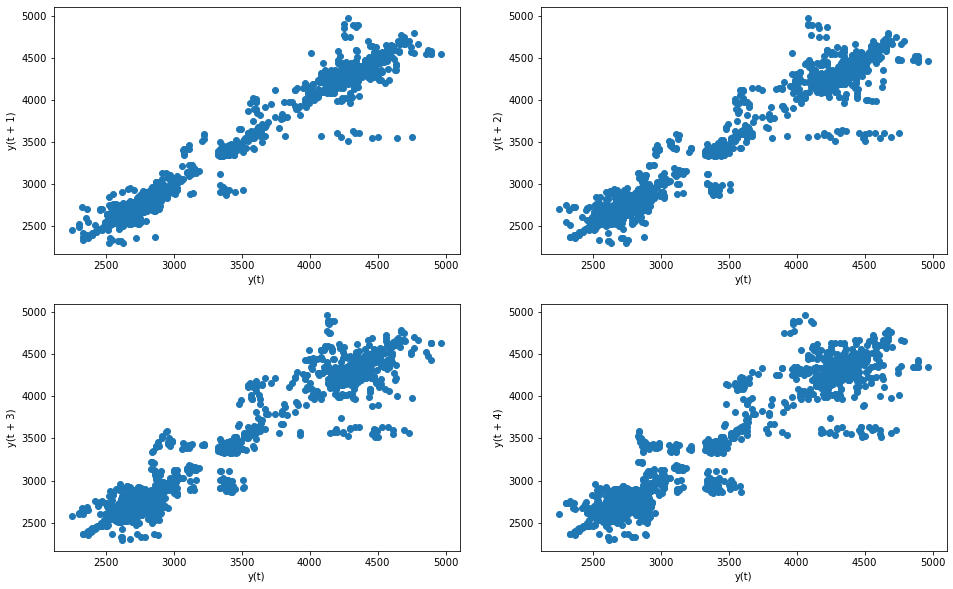

In [23]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
pd.plotting.lag_plot(data['price'],lag=1)
plt.subplot(2,2,2)
pd.plotting.lag_plot(data['price'],lag=2)
plt.subplot(2,2,3)
pd.plotting.lag_plot(data['price'],lag=3)
plt.subplot(2,2,4)
pd.plotting.lag_plot(data['price'],lag=4)
plt.show()

### ACF and PACF plots

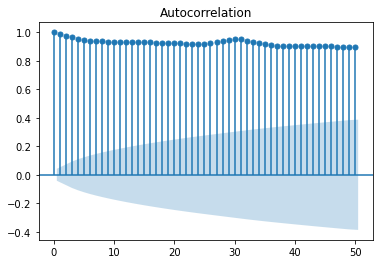

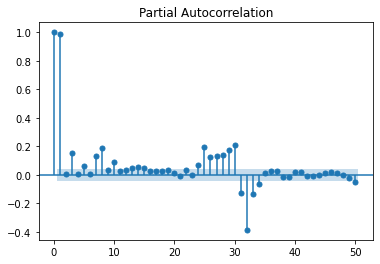

In [24]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.price,lags=50)
tsa_plots.plot_pacf(data.price,lags=50)
plt.show()


Since in ACF all the observations are significant we can't use MA model, also we have many significant values in PACF plot too so we can't use AR model. Here we will go with ARMA OR ARIMA madel to forecast.

###  Check for stationary of data

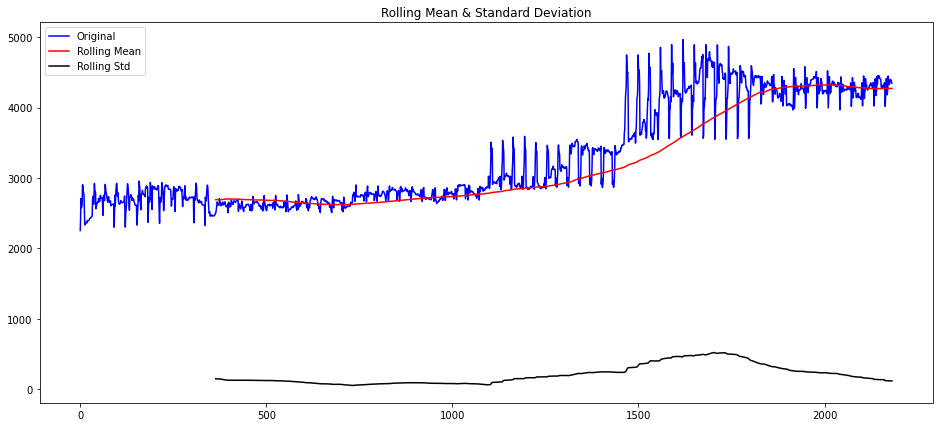

In [25]:
rolLmean = data['price'].rolling(365).mean() 
rolLstd = data['price'].rolling(365).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(data['price'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Here our data is not stationary so we used some transfomation techniques.

In [26]:
from statsmodels.tsa.stattools import adfuller
adfuller_results = adfuller(data['price'])
adfuller_results = pd.Series(adfuller_results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
adfuller_results

Test Statistic                   -0.309904
p-value                           0.924090
#Lags Used                       26.000000
Number of Observations Used    2155.000000
dtype: float64

### Log transformation 

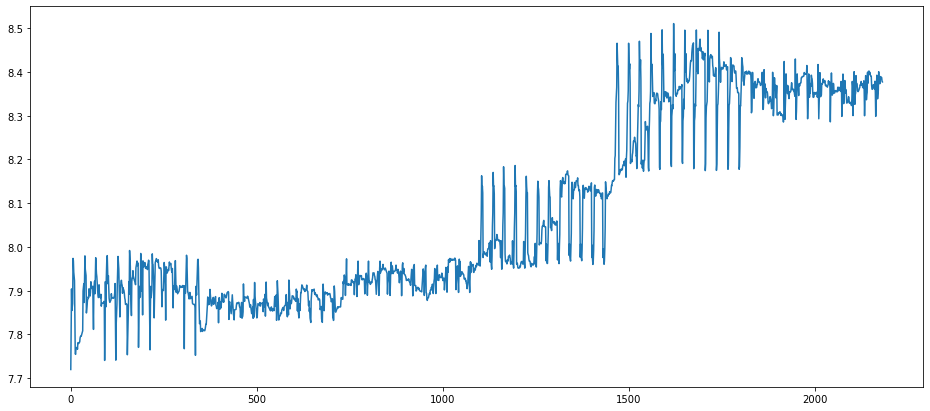

In [27]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
data['price_log'] = np.log(data['price'])#to transform to stationary from non-stationary
plt.plot(data['price_log'])
plt.show()

### square root transformation 

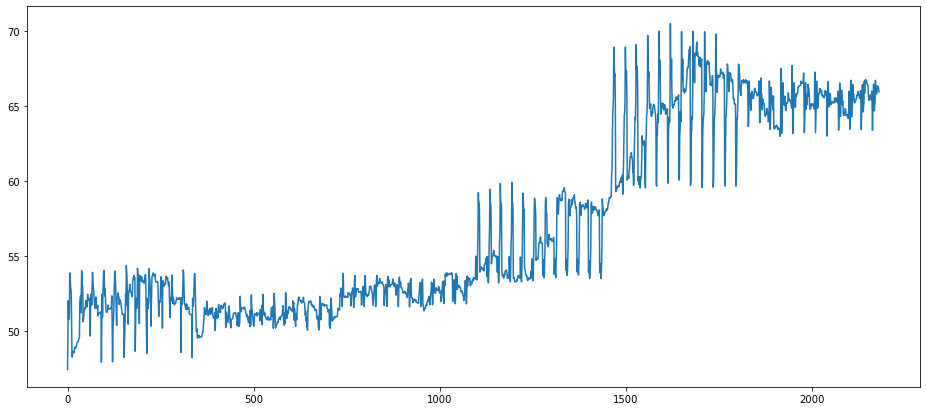

In [28]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
data['price_sqrt'] = np.sqrt(data['price'])#to transform to stationary from non-stationary
plt.plot(data['price_sqrt'])
plt.show()

### cube root transformation 

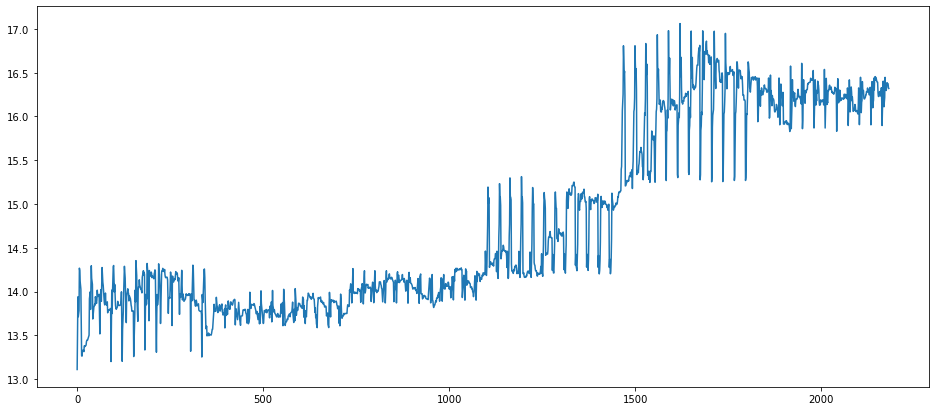

In [29]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
data['price_cbrt'] = np.cbrt(data['price'])#to transform to stationary from non-stationary
plt.plot(data['price_cbrt'])
plt.show()

### Log data

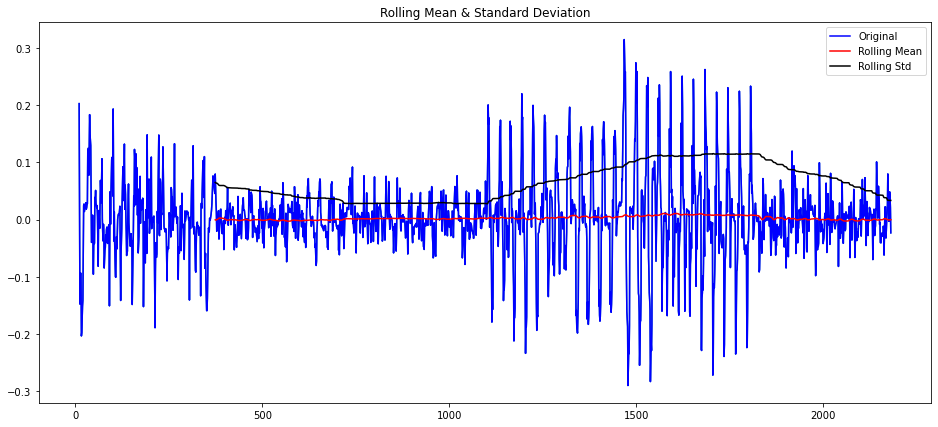

In [30]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = data['price_log']- data['price_log'].shift(periods=10) # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(365).mean()
rolLstd = ts_log_diff.rolling(365).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [31]:
from statsmodels.tsa.stattools import adfuller
adfuller_results = adfuller(data['price_log'])
adfuller_results = pd.Series(adfuller_results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
adfuller_results

Test Statistic                   -0.457214
p-value                           0.900099
#Lags Used                       26.000000
Number of Observations Used    2155.000000
dtype: float64

### square root data

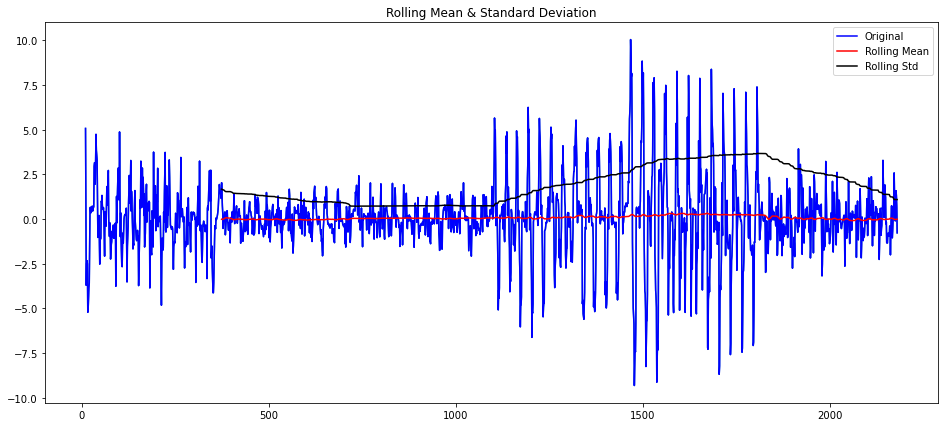

In [32]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_sqrt_diff = data['price_sqrt']- data['price_sqrt'].shift(periods=10) # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_sqrt_diff)

#Determing rolling statistics
rolLmean = ts_sqrt_diff.rolling(365).mean()
rolLstd = ts_sqrt_diff.rolling(365).std()

#Plot rolling statistics:
orig = plt.plot(ts_sqrt_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [33]:
adfuller_results = adfuller(data['price_sqrt'])
adfuller_results = pd.Series(adfuller_results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
adfuller_results

Test Statistic                   -0.372419
p-value                           0.914603
#Lags Used                       26.000000
Number of Observations Used    2155.000000
dtype: float64

### cube root data

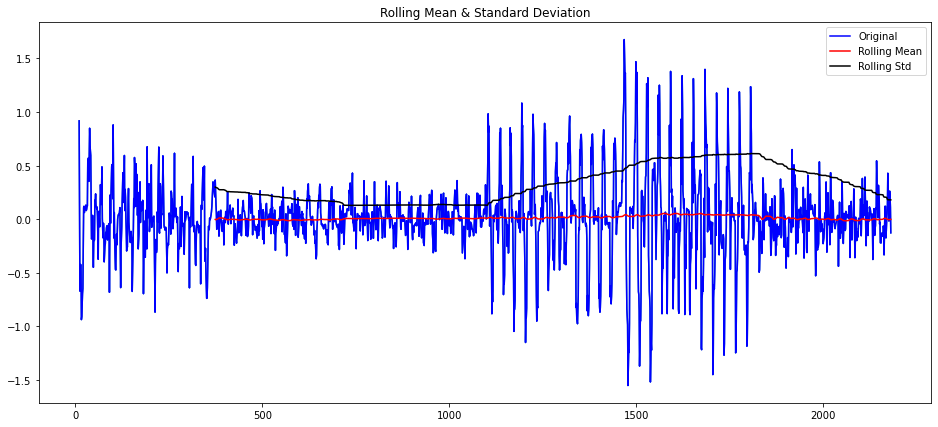

In [34]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_cbrt_diff = data['price_cbrt']- data['price_cbrt'].shift(periods=10) # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_cbrt_diff)

#Determing rolling statistics
rolLmean = ts_cbrt_diff.rolling(365).mean()
rolLstd = ts_cbrt_diff.rolling(365).std()

#Plot rolling statistics:
orig = plt.plot(ts_cbrt_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [35]:
adfuller_results = adfuller(data['price_cbrt'])
adfuller_results = pd.Series(adfuller_results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
adfuller_results

Test Statistic                   -0.398242
p-value                           0.910392
#Lags Used                       26.000000
Number of Observations Used    2155.000000
dtype: float64

### Shift

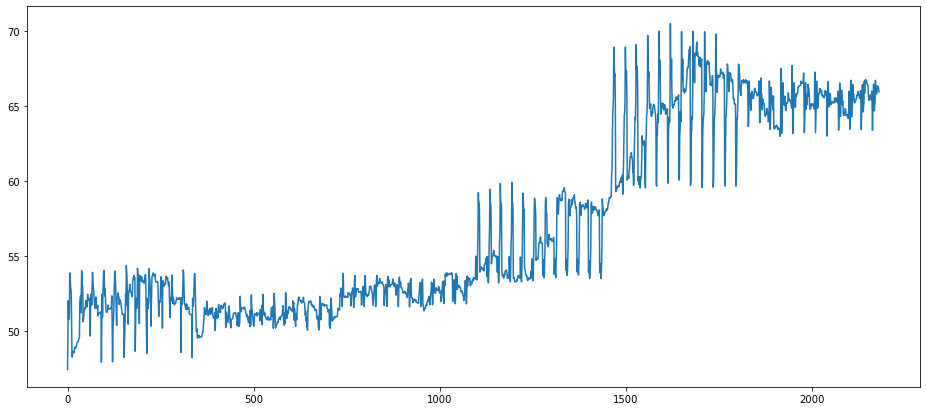

In [36]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

data['price_shift'] = (data['price'].shift(1))/data['price']#to transform to stationary from non-stationary
plt.plot(data['price_sqrt'])
plt.show()

In [37]:
data

,date,price,Date,Month,Year,price_log,price_sqrt,price_cbrt,price_shift
0,2016-01-01,2252.60,01,Jan,2016,7.719840,47.461563,13.108752,NaN
1,2016-01-02,2454.50,02,Jan,2016,7.805678,49.542911,13.489246,0.917743
2,2016-01-03,2708.10,03,Jan,2016,7.904003,52.039408,13.938677,0.906355
3,2016-01-04,2577.80,04,Jan,2016,7.854692,50.772040,13.711440,1.050547
4,2016-01-05,2597.75,05,Jan,2016,7.862401,50.968127,13.746721,0.992320
...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,17,Dec,2021,8.388086,66.290271,16.379471,1.001229
2178,2021-12-18,4389.50,18,Dec,2021,8.386971,66.253302,16.373380,1.001116
2179,2021-12-19,4389.50,19,Dec,2021,8.386971,66.253302,16.373380,1.000000
2180,2021-12-20,4354.10,20,Dec,2021,8.378873,65.985604,16.329246,1.008130


In [38]:
data.describe(include='all')

,date,price,Date,Month,Year,price_log,price_sqrt,price_cbrt,price_shift
count,2182,2182.000000,2182,2182,2182.000000,2182.000000,2182.000000,2182.000000,2181.000000
unique,2182,NaN,31,12,NaN,NaN,NaN,NaN,NaN
top,2016-01-01 00:00:00,NaN,01,Jan,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,72,186,NaN,NaN,NaN,NaN,NaN
first,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3284.450046,NaN,NaN,2018.488084,8.074339,56.982589,14.789413,1.000217
std,NaN,719.564434,NaN,NaN,1.704054,0.209488,6.119784,1.050690,0.032843
min,NaN,2252.600000,NaN,NaN,2016.000000,7.719840,47.461563,13.108752,0.854316
25%,NaN,2697.020000,NaN,NaN,2017.000000,7.899903,51.932841,13.919642,0.993075


In [39]:
data.fillna(1.000217,inplace=True) #replacing nan with mean value

In [40]:
data.isna().sum()

date           0
price          0
Date           0
Month          0
Year           0
price_log      0
price_sqrt     0
price_cbrt     0
price_shift    0
dtype: int64

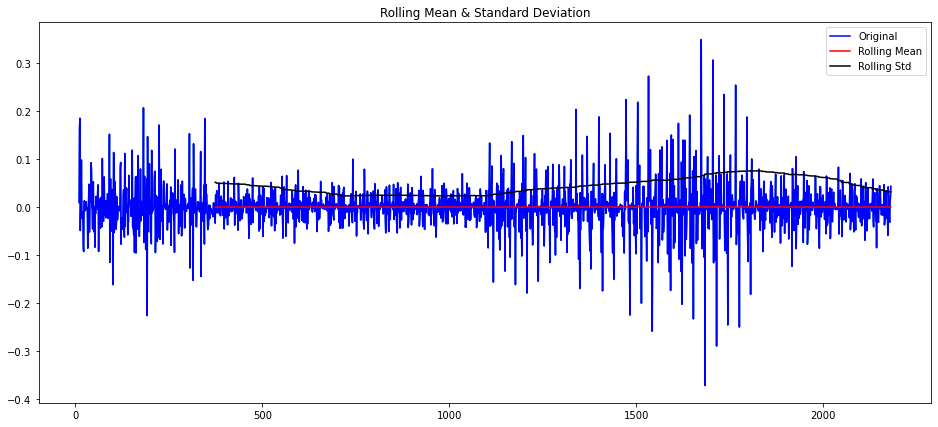

In [41]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_shift_diff = data['price_shift']- data['price_shift'].shift(periods=10) # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_shift_diff)

#Determing rolling statistics
rolLmean = ts_shift_diff.rolling(365).mean()
rolLstd = ts_shift_diff.rolling(365).std()

#Plot rolling statistics:
orig = plt.plot(ts_shift_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [42]:
adfuller_results = adfuller(data['price_shift'])
adfuller_results = pd.Series(adfuller_results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
adfuller_results

Test Statistic                  -20.915448
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    2155.000000
dtype: float64

In [43]:
data_mbf = data[['date','price','Month','Year','Date']]
data_mbf

,date,price,Month,Year,Date
0,2016-01-01,2252.60,Jan,2016,01
1,2016-01-02,2454.50,Jan,2016,02
2,2016-01-03,2708.10,Jan,2016,03
3,2016-01-04,2577.80,Jan,2016,04
4,2016-01-05,2597.75,Jan,2016,05
...,...,...,...,...,...
2177,2021-12-17,4394.40,Dec,2021,17
2178,2021-12-18,4389.50,Dec,2021,18
2179,2021-12-19,4389.50,Dec,2021,19
2180,2021-12-20,4354.10,Dec,2021,20


In [44]:
data_mbf['t'] = range(1,2183)

In [45]:
data_mbf['t_squre'] = np.square(data_mbf['t'])

In [46]:
data_mbf['price_shift'] = (data['price'].shift(1))/data['price']

In [47]:
data_mbf.isna().sum()

date           0
price          0
Month          0
Year           0
Date           0
t              0
t_squre        0
price_shift    1
dtype: int64

In [48]:
data_mbf.fillna(1.000217,inplace=True)

In [49]:
data_mbf

,date,price,Month,Year,Date,t,t_squre,price_shift
0,2016-01-01,2252.60,Jan,2016,01,1,1,1.000217
1,2016-01-02,2454.50,Jan,2016,02,2,4,0.917743
2,2016-01-03,2708.10,Jan,2016,03,3,9,0.906355
3,2016-01-04,2577.80,Jan,2016,04,4,16,1.050547
4,2016-01-05,2597.75,Jan,2016,05,5,25,0.992320
...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,Dec,2021,17,2178,4743684,1.001229
2178,2021-12-18,4389.50,Dec,2021,18,2179,4748041,1.001116
2179,2021-12-19,4389.50,Dec,2021,19,2180,4752400,1.000000
2180,2021-12-20,4354.10,Dec,2021,20,2181,4756761,1.008130


In [50]:
data_mbf = pd.get_dummies(data_mbf,columns=['Date'])
data_mbf

,date,price,Month,Year,t,t_squre,price_shift,Date_01,Date_02,Date_03,...,Date_22,Date_23,Date_24,Date_25,Date_26,Date_27,Date_28,Date_29,Date_30,Date_31
0,2016-01-01,2252.60,Jan,2016,1,1,1.000217,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,Jan,2016,2,4,0.917743,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,Jan,2016,3,9,0.906355,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,Jan,2016,4,16,1.050547,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,Jan,2016,5,25,0.992320,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,Dec,2021,2178,4743684,1.001229,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2178,2021-12-18,4389.50,Dec,2021,2179,4748041,1.001116,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2179,2021-12-19,4389.50,Dec,2021,2180,4752400,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2180,2021-12-20,4354.10,Dec,2021,2181,4756761,1.008130,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Splitting Data

train = data_mbf.head(2182-180)
test  = data_mbf.tail(180)

In [52]:
test

,date,price,Month,Year,t,t_squre,price_shift,Date_01,Date_02,Date_03,...,Date_22,Date_23,Date_24,Date_25,Date_26,Date_27,Date_28,Date_29,Date_30,Date_31
2002,2021-06-25,4238.9,Jun,2021,2003,4012009,0.996910,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2003,2021-06-26,4242.3,Jun,2021,2004,4016016,0.999199,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2004,2021-06-27,4244.4,Jun,2021,2005,4020025,0.999505,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2005,2021-06-28,4241.7,Jun,2021,2006,4024036,1.000637,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2006,2021-06-29,4197.8,Jun,2021,2007,4028049,1.010458,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.4,Dec,2021,2178,4743684,1.001229,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2178,2021-12-18,4389.5,Dec,2021,2179,4748041,1.001116,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2179,2021-12-19,4389.5,Dec,2021,2180,4752400,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2180,2021-12-20,4354.1,Dec,2021,2181,4756761,1.008130,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
train.shape,test.shape

((2002, 38), (180, 38))

# Model Based Forecasting

In [54]:
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.formula.api as smf

### Linear Model

In [55]:
linear = smf.ols('price~t',data=train).fit()
pred_linear = linear.predict(test['t'])
rmse_linear = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_linear))**2))
rmse_linear

101.43139727150506

### Exponential Model

In [56]:
data

,date,price,Date,Month,Year,price_log,price_sqrt,price_cbrt,price_shift
0,2016-01-01,2252.60,01,Jan,2016,7.719840,47.461563,13.108752,1.000217
1,2016-01-02,2454.50,02,Jan,2016,7.805678,49.542911,13.489246,0.917743
2,2016-01-03,2708.10,03,Jan,2016,7.904003,52.039408,13.938677,0.906355
3,2016-01-04,2577.80,04,Jan,2016,7.854692,50.772040,13.711440,1.050547
4,2016-01-05,2597.75,05,Jan,2016,7.862401,50.968127,13.746721,0.992320
...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,17,Dec,2021,8.388086,66.290271,16.379471,1.001229
2178,2021-12-18,4389.50,18,Dec,2021,8.386971,66.253302,16.373380,1.001116
2179,2021-12-19,4389.50,19,Dec,2021,8.386971,66.253302,16.373380,1.000000
2180,2021-12-20,4354.10,20,Dec,2021,8.378873,65.985604,16.329246,1.008130


In [57]:
exponential = smf.ols('price_shift~t',data=train).fit()
pred_exponential = exponential.predict(test['t'])
rmse_exponential = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_exponential))**2))
rmse_exponential

4282.010744781291

### Quadratic Model

In [58]:
quadratic = smf.ols('price~t+t_squre',data=train).fit()
pred_quadratic = quadratic.predict(test[['t','t_squre']])
rmse_quadratic = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_quadratic))**2))
rmse_quadratic

749.8060407792753

### Additive seasonality 

In [59]:
additive = smf.ols('price~Date_01+Date_02+Date_03+Date_04+Date_05+Date_06+Date_07+Date_08+Date_09+Date_10+Date_11+Date_12+Date_13+Date_14+Date_15+Date_16+Date_17+Date_18+Date_19+Date_20+Date_21+Date_22+Date_23+Date_24+Date_25+Date_26+Date_27+Date_28+Date_29+Date_30+Date_31',data=train).fit()
pred_additive = additive.predict(test[['Date_01','Date_02', 'Date_03', 'Date_04', 'Date_05', 'Date_06', 'Date_07','Date_08', 'Date_09', 'Date_10', 'Date_11', 'Date_12', 'Date_13','Date_14', 'Date_15', 'Date_16', 'Date_17', 'Date_18', 'Date_19','Date_20', 'Date_21', 'Date_22', 'Date_23', 'Date_24', 'Date_25','Date_26', 'Date_27', 'Date_28', 'Date_29', 'Date_30', 'Date_31']])
rmse_additive = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_additive))**2))
rmse_additive

1095.9376530320205

### Additive Quadratic seasonality 

In [60]:
additive_quadratic = smf.ols('price~t+t_squre+Date_01+Date_02+Date_03+Date_04+Date_05+Date_06+Date_07+Date_08+Date_09+Date_10+Date_11+Date_12+Date_13+Date_14+Date_15+Date_16+Date_17+Date_18+Date_19+Date_20+Date_21+Date_22+Date_23+Date_24+Date_25+Date_26+Date_27+Date_28+Date_29+Date_30+Date_31',data=train).fit()
pred_additive_quadratic = additive_quadratic.predict(test[['t','t_squre','Date_01','Date_02', 'Date_03', 'Date_04', 'Date_05', 'Date_06', 'Date_07','Date_08', 'Date_09', 'Date_10', 'Date_11', 'Date_12', 'Date_13','Date_14', 'Date_15', 'Date_16', 'Date_17', 'Date_18', 'Date_19','Date_20', 'Date_21', 'Date_22', 'Date_23', 'Date_24', 'Date_25','Date_26', 'Date_27', 'Date_28', 'Date_29', 'Date_30', 'Date_31']])
rmse_additive_quadratic = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_additive_quadratic))**2))
rmse_additive_quadratic

753.9982229727575

### Multiplicative seasonality 

In [61]:
multiplicative = smf.ols('price_shift~Date_01+Date_02+Date_03+Date_04+Date_05+Date_06+Date_07+Date_08+Date_09+Date_10+Date_11+Date_12+Date_13+Date_14+Date_15+Date_16+Date_17+Date_18+Date_19+Date_20+Date_21+Date_22+Date_23+Date_24+Date_25+Date_26+Date_27+Date_28+Date_29+Date_30+Date_31',data=train).fit()
pred_multiplicative = multiplicative.predict(test[['Date_01','Date_02', 'Date_03', 'Date_04', 'Date_05', 'Date_06', 'Date_07','Date_08', 'Date_09', 'Date_10', 'Date_11', 'Date_12', 'Date_13','Date_14', 'Date_15', 'Date_16', 'Date_17', 'Date_18', 'Date_19','Date_20', 'Date_21', 'Date_22', 'Date_23', 'Date_24', 'Date_25','Date_26', 'Date_27', 'Date_28', 'Date_29', 'Date_30', 'Date_31']])
rmse_multiplicative = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_multiplicative))**2))
rmse_multiplicative

4282.012168527065

### Multiplicative Additive seasonality 

In [62]:
multiplicative_additive = smf.ols('price_shift~t+Date_01+Date_02+Date_03+Date_04+Date_05+Date_06+Date_07+Date_08+Date_09+Date_10+Date_11+Date_12+Date_13+Date_14+Date_15+Date_16+Date_17+Date_18+Date_19+Date_20+Date_21+Date_22+Date_23+Date_24+Date_25+Date_26+Date_27+Date_28+Date_29+Date_30+Date_31',data=train).fit()
pred_multiplicative_additive = multiplicative_additive.predict(test[['t','Date_01','Date_02', 'Date_03', 'Date_04', 'Date_05', 'Date_06', 'Date_07','Date_08', 'Date_09', 'Date_10', 'Date_11', 'Date_12', 'Date_13','Date_14', 'Date_15', 'Date_16', 'Date_17', 'Date_18', 'Date_19','Date_20', 'Date_21', 'Date_22', 'Date_23', 'Date_24', 'Date_25','Date_26', 'Date_27', 'Date_28', 'Date_29', 'Date_30', 'Date_31']])
rmse_multiplicative_additive = np.sqrt(np.mean((np.array(test['price'])-np.array(pred_multiplicative_additive))**2))
rmse_multiplicative_additive

4282.010612653558

### Compare the results

In [63]:
result = {'Models':['Linear Model','Exponential Model','Quadratic Model','Additive seasonality','Additive Quadratic seasonality','Multiplicative seasonality','Multiplicative Additive seasonality'],
          'RMSE':[rmse_linear,rmse_exponential,rmse_quadratic,rmse_additive,rmse_additive_quadratic,rmse_multiplicative,rmse_multiplicative_additive]}

In [64]:
result = pd.DataFrame(data=result)
result

,Models,RMSE
0,Linear Model,101.431397
1,Exponential Model,4282.010745
2,Quadratic Model,749.806041
3,Additive seasonality,1095.937653
4,Additive Quadratic seasonality,753.998223
5,Multiplicative seasonality,4282.012169
6,Multiplicative Additive seasonality,4282.010613


In [65]:
result.sort_values(by='RMSE')

,Models,RMSE
0,Linear Model,101.431397
2,Quadratic Model,749.806041
4,Additive Quadratic seasonality,753.998223
3,Additive seasonality,1095.937653
6,Multiplicative Additive seasonality,4282.010613
1,Exponential Model,4282.010745
5,Multiplicative seasonality,4282.012169


From above table for linear model we got the less Root mean squred error so we will built model using linear model.

### Build the model for entire dataset

In [66]:
data_mbf

,date,price,Month,Year,t,t_squre,price_shift,Date_01,Date_02,Date_03,...,Date_22,Date_23,Date_24,Date_25,Date_26,Date_27,Date_28,Date_29,Date_30,Date_31
0,2016-01-01,2252.60,Jan,2016,1,1,1.000217,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,Jan,2016,2,4,0.917743,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,Jan,2016,3,9,0.906355,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,Jan,2016,4,16,1.050547,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,Jan,2016,5,25,0.992320,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,Dec,2021,2178,4743684,1.001229,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2178,2021-12-18,4389.50,Dec,2021,2179,4748041,1.001116,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2179,2021-12-19,4389.50,Dec,2021,2180,4752400,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2180,2021-12-20,4354.10,Dec,2021,2181,4756761,1.008130,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
full_model = smf.ols('price~Date_01+Date_02+Date_03+Date_04+Date_05+Date_06+Date_07+Date_08+Date_09+Date_10+Date_11+Date_12+Date_13+Date_14+Date_15+Date_16+Date_17+Date_18+Date_19+Date_20+Date_21+Date_22+Date_23+Date_24+Date_25+Date_26+Date_27+Date_28+Date_29+Date_30+Date_31',data=data_mbf).fit()


### Create forecasting data frame

In [68]:
test

,date,price,Month,Year,t,t_squre,price_shift,Date_01,Date_02,Date_03,...,Date_22,Date_23,Date_24,Date_25,Date_26,Date_27,Date_28,Date_29,Date_30,Date_31
2002,2021-06-25,4238.9,Jun,2021,2003,4012009,0.996910,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2003,2021-06-26,4242.3,Jun,2021,2004,4016016,0.999199,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2004,2021-06-27,4244.4,Jun,2021,2005,4020025,0.999505,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2005,2021-06-28,4241.7,Jun,2021,2006,4024036,1.000637,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2006,2021-06-29,4197.8,Jun,2021,2007,4028049,1.010458,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.4,Dec,2021,2178,4743684,1.001229,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2178,2021-12-18,4389.5,Dec,2021,2179,4748041,1.001116,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2179,2021-12-19,4389.5,Dec,2021,2180,4752400,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2180,2021-12-20,4354.1,Dec,2021,2181,4756761,1.008130,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
forecast_data = pd.date_range(start="2021-06-25",end="2021-12-21",freq='D',name='Date')
forecast_data

DatetimeIndex(['2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
               '2021-07-03', '2021-07-04',
               ...
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21'],
              dtype='datetime64[ns]', name='Date', length=180, freq='D')

In [70]:
forecast_data = pd.DataFrame(data=forecast_data)
forecast_data['date'] = forecast_data.Date.dt.strftime('%d')
forecast_data = pd.get_dummies(forecast_data,columns=['date'])
forecast_data['Month'] = forecast_data.Date.dt.strftime('%b')
forecast_data['Year'] = pd.DatetimeIndex(forecast_data['Date']).year
forecast_data['t'] = range(2183,2183+180)
forecast_data['t_squre'] = np.square(forecast_data['t'])

In [71]:
forecast_data

,Date,date_01,date_02,date_03,date_04,date_05,date_06,date_07,date_08,date_09,...,date_26,date_27,date_28,date_29,date_30,date_31,Month,Year,t,t_squre
0,2021-06-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Jun,2021,2183,4765489
1,2021-06-26,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,Jun,2021,2184,4769856
2,2021-06-27,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,Jun,2021,2185,4774225
3,2021-06-28,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,Jun,2021,2186,4778596
4,2021-06-29,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,Jun,2021,2187,4782969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2021-12-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Dec,2021,2358,5560164
176,2021-12-18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Dec,2021,2359,5564881
177,2021-12-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Dec,2021,2360,5569600
178,2021-12-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Dec,2021,2361,5574321


In [72]:
data_mbf['t'] = range(1,2183)
data_mbf['t_squre'] = np.square(data_mbf['t'])
data_mbf['price_shift'] = (data['price'].shift(1))/data['price']

In [73]:
data_mbf.fillna(1.000217,inplace=True)

In [74]:
data_mbf

,date,price,Month,Year,t,t_squre,price_shift,Date_01,Date_02,Date_03,...,Date_22,Date_23,Date_24,Date_25,Date_26,Date_27,Date_28,Date_29,Date_30,Date_31
0,2016-01-01,2252.60,Jan,2016,1,1,1.000217,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,Jan,2016,2,4,0.917743,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,Jan,2016,3,9,0.906355,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,Jan,2016,4,16,1.050547,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,Jan,2016,5,25,0.992320,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,Dec,2021,2178,4743684,1.001229,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2178,2021-12-18,4389.50,Dec,2021,2179,4748041,1.001116,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2179,2021-12-19,4389.50,Dec,2021,2180,4752400,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2180,2021-12-20,4354.10,Dec,2021,2181,4756761,1.008130,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Forecasting the next six months price

In [75]:
pred_forecast = full_model.predict()
forecast_data['price_new'] = pd.DataFrame(data=pred_forecast,columns=['price_new'])
forecast_data

,Date,date_01,date_02,date_03,date_04,date_05,date_06,date_07,date_08,date_09,...,date_27,date_28,date_29,date_30,date_31,Month,Year,t,t_squre,price_new
0,2021-06-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Jun,2021,2183,4765489,3097.345370
1,2021-06-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Jun,2021,2184,4769856,3130.469444
2,2021-06-27,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,Jun,2021,2185,4774225,3145.599306
3,2021-06-28,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,Jun,2021,2186,4778596,3180.538194
4,2021-06-29,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,Jun,2021,2187,4782969,3229.640278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2021-12-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Dec,2021,2358,5560164,3287.592019
176,2021-12-18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Dec,2021,2359,5564881,3282.874648
177,2021-12-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Dec,2021,2360,5569600,3281.998592
178,2021-12-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Dec,2021,2361,5574321,3280.730516


In [76]:
test

,date,price,Month,Year,t,t_squre,price_shift,Date_01,Date_02,Date_03,...,Date_22,Date_23,Date_24,Date_25,Date_26,Date_27,Date_28,Date_29,Date_30,Date_31
2002,2021-06-25,4238.9,Jun,2021,2003,4012009,0.996910,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2003,2021-06-26,4242.3,Jun,2021,2004,4016016,0.999199,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2004,2021-06-27,4244.4,Jun,2021,2005,4020025,0.999505,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2005,2021-06-28,4241.7,Jun,2021,2006,4024036,1.000637,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2006,2021-06-29,4197.8,Jun,2021,2007,4028049,1.010458,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.4,Dec,2021,2178,4743684,1.001229,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2178,2021-12-18,4389.5,Dec,2021,2179,4748041,1.001116,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2179,2021-12-19,4389.5,Dec,2021,2180,4752400,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2180,2021-12-20,4354.1,Dec,2021,2181,4756761,1.008130,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
full_data = pd.concat([data_mbf,forecast_data])
full_data[['price','price_new']]

,price,price_new
0,2252.60,NaN
1,2454.50,NaN
2,2708.10,NaN
3,2577.80,NaN
4,2597.75,NaN
...,...,...
175,NaN,3287.592019
176,NaN,3282.874648
177,NaN,3281.998592
178,NaN,3280.730516


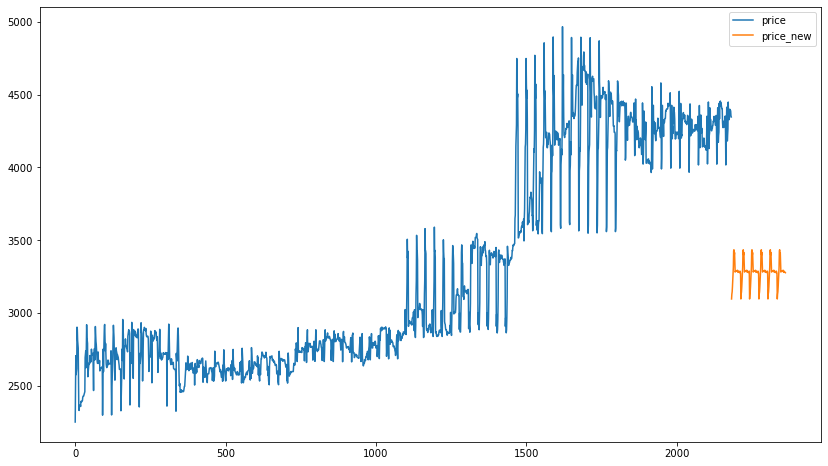

In [78]:

forecasting_plot = full_data[['price','price_new']].reset_index(drop=True).plot(figsize=(14,8))
forecasting_plot
plt.show()

Here in our model for 2021-06-25 its forecasting a price of 3095.25 but in actual its 4238.9 so we facing a large difference so our model based forecasting technique is falied so we will go for data driven forecasting techniques

## Data Driven Forecasting

In [79]:
data

,date,price,Date,Month,Year,price_log,price_sqrt,price_cbrt,price_shift
0,2016-01-01,2252.60,01,Jan,2016,7.719840,47.461563,13.108752,1.000217
1,2016-01-02,2454.50,02,Jan,2016,7.805678,49.542911,13.489246,0.917743
2,2016-01-03,2708.10,03,Jan,2016,7.904003,52.039408,13.938677,0.906355
3,2016-01-04,2577.80,04,Jan,2016,7.854692,50.772040,13.711440,1.050547
4,2016-01-05,2597.75,05,Jan,2016,7.862401,50.968127,13.746721,0.992320
...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,17,Dec,2021,8.388086,66.290271,16.379471,1.001229
2178,2021-12-18,4389.50,18,Dec,2021,8.386971,66.253302,16.373380,1.001116
2179,2021-12-19,4389.50,19,Dec,2021,8.386971,66.253302,16.373380,1.000000
2180,2021-12-20,4354.10,20,Dec,2021,8.378873,65.985604,16.329246,1.008130


In [80]:
data_ddf = data[['date','price']]
data_ddf

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [81]:
data_ddf['price_shift'] = (data_ddf['price'].shift(1))/data_ddf['price']

In [82]:
data_ddf.fillna(1.000217,inplace=True)

In [83]:
data_ddf

,date,price,price_shift
0,2016-01-01,2252.60,1.000217
1,2016-01-02,2454.50,0.917743
2,2016-01-03,2708.10,0.906355
3,2016-01-04,2577.80,1.050547
4,2016-01-05,2597.75,0.992320
...,...,...,...
2177,2021-12-17,4394.40,1.001229
2178,2021-12-18,4389.50,1.001116
2179,2021-12-19,4389.50,1.000000
2180,2021-12-20,4354.10,1.008130


In [84]:
data_ddf['date'] = pd.to_datetime(data_ddf['date'])
data_ddf

,date,price,price_shift
0,2016-01-01,2252.60,1.000217
1,2016-01-02,2454.50,0.917743
2,2016-01-03,2708.10,0.906355
3,2016-01-04,2577.80,1.050547
4,2016-01-05,2597.75,0.992320
...,...,...,...
2177,2021-12-17,4394.40,1.001229
2178,2021-12-18,4389.50,1.001116
2179,2021-12-19,4389.50,1.000000
2180,2021-12-20,4354.10,1.008130


In [85]:
data_ddf.dtypes

date           datetime64[ns]
price                 float64
price_shift           float64
dtype: object

### Moving Average

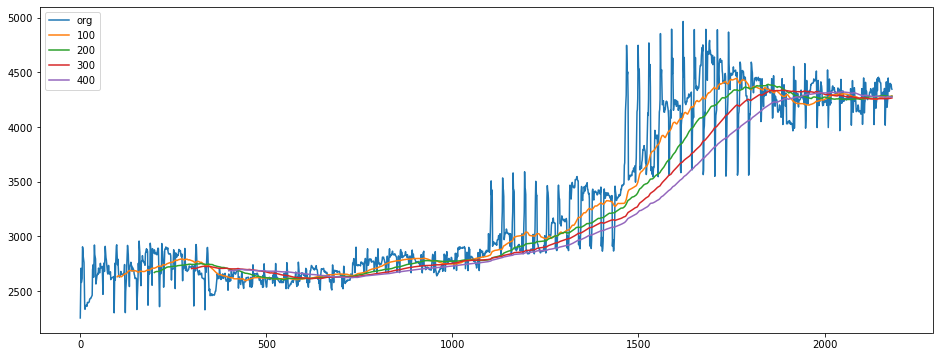

In [86]:
plt.figure(figsize=(16,6))
data['price'].plot(label="org")
for i in range(100,500,100):
    data_ddf['price'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

# Splitting Data

In [87]:
train = data_ddf.head(2182-365)
test  = data_ddf.tail(365)

In [88]:
train.shape,test.shape

((1817, 3), (365, 3))

### Simple Exponential Smoothing Model

##### Forecast based on current time

In [89]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
simple_exp = SimpleExpSmoothing(train['price_shift'])
simple_exp = simple_exp.fit(smoothing_level=0.2)
pred_simple_exp = simple_exp.predict(start = test.index[0],end = test.index[-1])
rmse_simple_exp = np.sqrt(np.mean((np.array(test['price_shift'])-np.array(pred_simple_exp))**2))
rmse_simple_exp

0.023881270334820254

### Holt Model

##### Forecast based on current time and trend

In [90]:
from statsmodels.tsa.holtwinters import Holt
holt_model = Holt(train['price_shift'])
holt_model = holt_model.fit(smoothing_level=0.8,smoothing_trend=0.2)
pred_holt  = holt_model.predict(start=test.index[0],end=test.index[-1])
rmse_holt = np.sqrt(np.mean((np.array(test['price_shift'])-np.array(pred_holt))**2))
rmse_holt

0.024671227650639116

### Holts winter exponential smoothing 

##### Forecast based on current time, trend and seasonality

### with  additive trend and additive seasonality

In [91]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_add_add = ExponentialSmoothing(train['price_shift'],trend='add',seasonal='add',seasonal_periods=262)
hwe_add_add = hwe_add_add.fit()
pred_hwe_add_add = hwe_add_add.predict(start=test.index[0],end=test.index[-1])
rmse_hwe_add_add = np.sqrt(np.mean((np.array(test['price_shift'])-np.array(pred_hwe_add_add))**2))
rmse_hwe_add_add

0.028157421139350897

### with  additive trend and multiclative seasonality

In [92]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_add_mul = ExponentialSmoothing(train['price_shift'],trend='add',seasonal='mul',seasonal_periods=262)
hwe_add_mul = hwe_add_mul.fit()
pred_hwe_add_mul = hwe_add_mul.predict(start=test.index[0],end=test.index[-1])
rmse_hwe_add_mul = np.sqrt(np.mean((np.array(test['price_shift'])-np.array(np.exp(pred_hwe_add_mul)))**2))
rmse_hwe_add_mul

1.7203970011717105

### with  multiclative trend and additive seasonality

In [93]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_mul_add = ExponentialSmoothing(train['price_shift'],trend='mul',seasonal='add',seasonal_periods=262)
hwe_mul_add = hwe_mul_add.fit()
pred_hwe_mul_add = hwe_mul_add.predict(start=test.index[0],end=test.index[-1])
rmse_hwe_mul_add = np.sqrt(np.mean((np.array(test['price_shift'])-np.array(pred_hwe_mul_add))**2))
rmse_hwe_mul_add

0.028156727154711285

### with  multiclative trend and multiclative seasonality

In [94]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_mul_mul = ExponentialSmoothing(train['price_shift'],trend='mul',seasonal='mul',seasonal_periods=262)
hwe_mul_mul = hwe_mul_mul.fit()
pred_hwe_mul_mul = hwe_mul_mul.predict(start=test.index[0],end=test.index[-1])
rmse_hwe_mul_mul = np.sqrt(np.mean((np.array(test['price_shift'])-np.array(pred_hwe_mul_mul))**2))
rmse_hwe_mul_mul

0.02816248980516678

### Compare the results

In [95]:
result = {'Models':['Simple Exponential Smoothing Model','Holt Model','Holts winter exponential smoothing with additive trend and additive seasonality','Holts winter exponential smoothing with additive trend and multiclative seasonality','Holts winter exponential smoothing with multiclative trend and additive seasonality','Holts winter exponential smoothing with multiclative trend and multiclative seasonality'],
          'RMSE':[rmse_simple_exp,rmse_holt,rmse_hwe_add_add,rmse_hwe_add_mul,rmse_hwe_mul_add,rmse_hwe_mul_mul]}

In [96]:
pd.set_option('max_colwidth', None)
result = pd.DataFrame(data=result)
result

,Models,RMSE
0,Simple Exponential Smoothing Model,0.023881
1,Holt Model,0.024671
2,Holts winter exponential smoothing with additive trend and additive seasonality,0.028157
3,Holts winter exponential smoothing with additive trend and multiclative seasonality,1.720397
4,Holts winter exponential smoothing with multiclative trend and additive seasonality,0.028157
5,Holts winter exponential smoothing with multiclative trend and multiclative seasonality,0.028162


In [97]:
result.sort_values(by='RMSE')

,Models,RMSE
0,Simple Exponential Smoothing Model,0.023881
1,Holt Model,0.024671
4,Holts winter exponential smoothing with multiclative trend and additive seasonality,0.028157
2,Holts winter exponential smoothing with additive trend and additive seasonality,0.028157
5,Holts winter exponential smoothing with multiclative trend and multiclative seasonality,0.028162
3,Holts winter exponential smoothing with additive trend and multiclative seasonality,1.720397


### Build the model for entire dataset

In [98]:
data_ddf

,date,price,price_shift
0,2016-01-01,2252.60,1.000217
1,2016-01-02,2454.50,0.917743
2,2016-01-03,2708.10,0.906355
3,2016-01-04,2577.80,1.050547
4,2016-01-05,2597.75,0.992320
...,...,...,...
2177,2021-12-17,4394.40,1.001229
2178,2021-12-18,4389.50,1.001116
2179,2021-12-19,4389.50,1.000000
2180,2021-12-20,4354.10,1.008130


In [99]:
from statsmodels.tsa.api import SimpleExpSmoothing
full_model = SimpleExpSmoothing(data_ddf['price'])
full_model = full_model.fit()

### Create forecasting data frame

In [100]:
test

,date,price,price_shift
1817,2020-12-22,4423.1,1.007031
1818,2020-12-23,4434.4,0.997452
1819,2020-12-24,4439.3,0.998896
1820,2020-12-25,4437.9,1.000315
1821,2020-12-26,4437.9,1.000000
...,...,...,...
2177,2021-12-17,4394.4,1.001229
2178,2021-12-18,4389.5,1.001116
2179,2021-12-19,4389.5,1.000000
2180,2021-12-20,4354.1,1.008130


In [101]:
forecast_data = pd.date_range(start="2020-12-22",end="2021-12-21",freq='D',name='date')
forecast_data = pd.DataFrame(data=forecast_data,columns=['date'])
forecast_data

,date
0,2020-12-22
1,2020-12-23
2,2020-12-24
3,2020-12-25
4,2020-12-26
...,...
360,2021-12-17
361,2021-12-18
362,2021-12-19
363,2021-12-20


In [102]:
### Forecasting the next one year price

pred_forecast = full_model.predict(start=forecast_data.index[0],end=forecast_data.index[-1])
#pred_forecast = np.exp(pred_forecast)
pred_forecast
forecast_data['price_new'] = pd.DataFrame(data=pred_forecast,columns=['price_new'])
forecast_data


,date,price_new
0,2020-12-22,2252.600000
1,2020-12-23,2252.600000
2,2020-12-24,2451.166302
3,2020-12-25,2703.857606
4,2020-12-26,2579.881416
...,...,...
360,2021-12-17,2462.182894
361,2021-12-18,2461.216229
362,2021-12-19,2469.166524
363,2021-12-20,2484.050122


In [103]:
full_data = pd.concat([data,forecast_data])
full_data

,date,price,Date,Month,Year,price_log,price_sqrt,price_cbrt,price_shift,price_new
0,2016-01-01,2252.60,01,Jan,2016.0,7.719840,47.461563,13.108752,1.000217,NaN
1,2016-01-02,2454.50,02,Jan,2016.0,7.805678,49.542911,13.489246,0.917743,NaN
2,2016-01-03,2708.10,03,Jan,2016.0,7.904003,52.039408,13.938677,0.906355,NaN
3,2016-01-04,2577.80,04,Jan,2016.0,7.854692,50.772040,13.711440,1.050547,NaN
4,2016-01-05,2597.75,05,Jan,2016.0,7.862401,50.968127,13.746721,0.992320,NaN
...,...,...,...,...,...,...,...,...,...,...
360,2021-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2462.182894
361,2021-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2461.216229
362,2021-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2469.166524
363,2021-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2484.050122


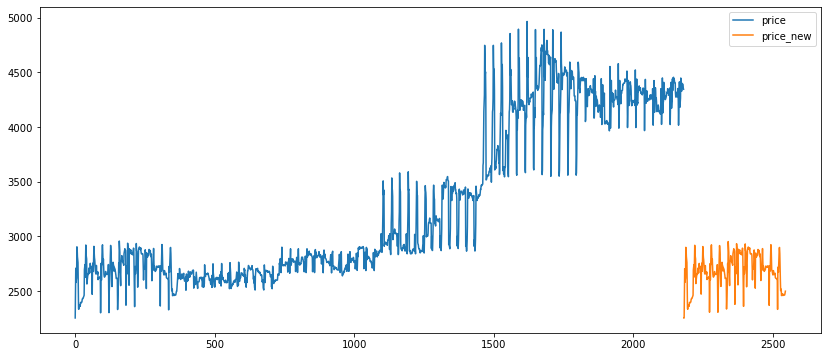

In [104]:
forecasting_plot = full_data[['price','price_new']].reset_index(drop=True).plot(figsize=(14,6))
forecasting_plot
plt.show()

Even data driven models also not getting better forecast so we go for ARIMA model.

In [105]:
import itertools
p = range(0,4) #AR order
d = range(0,4) #Shift
q = range(0,4) #MA order
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 0),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [106]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima = ARIMA(train['price'],order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 28523.112506704274
(0, 0, 1) 26424.717015139035
(0, 0, 2) 25125.299805874136
(0, 0, 3) 24359.49046158187
(0, 1, 0) 22432.700285684845
(0, 1, 1) 22434.687943551773
(0, 1, 2) 22401.363696474007
(0, 1, 3) 22403.36359009973
(0, 2, 0) 23673.826970282873
(0, 2, 1) 22430.818901371626
(0, 2, 2) 22432.800277012066
(0, 2, 3) 22399.798247701765
(1, 0, 0) 22436.74659676626
(1, 0, 1) 22438.449704856837
(1, 0, 2) 22409.64808031688
(1, 0, 3) 22411.347324879018
(1, 1, 0) 22434.691080228284
(1, 1, 1) 22290.796015629803
(1, 1, 2) 22267.138749127895
(1, 1, 3) 22267.098335677303
(1, 2, 0) 23293.584101235017
(1, 2, 1) 22432.805005304883
(1, 2, 3) 22401.62217088887
(2, 0, 0) 22438.522068756465


C:\Users\LG\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LG\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 1) 22323.721588531764


C:\Users\LG\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2) 22300.867316021733
(2, 0, 3) 22298.969061246782
(2, 1, 0) 22407.139531500732
(2, 1, 1) 22268.947416743886
(2, 2, 0) 22962.724044547416
(2, 2, 1) 22405.490669471143
(2, 2, 2) 22402.888852482713


C:\Users\LG\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 2, 3) 22258.541698239504
(3, 0, 0) 22414.48542062338


C:\Users\LG\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LG\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 1) 22301.0990418034


C:\Users\LG\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 2) 22293.20787291701
(3, 0, 3) 22295.20553776851
(3, 1, 0) 22407.498878712402
(3, 1, 1) 22270.511858816222
(3, 2, 0) 22876.91193110394
(3, 2, 1) 22405.793733053062
(3, 2, 2) 22404.79391545589
(3, 2, 3) 22384.775096826885


In [107]:
test

,date,price,price_shift
1817,2020-12-22,4423.1,1.007031
1818,2020-12-23,4434.4,0.997452
1819,2020-12-24,4439.3,0.998896
1820,2020-12-25,4437.9,1.000315
1821,2020-12-26,4437.9,1.000000
...,...,...,...
2177,2021-12-17,4394.4,1.001229
2178,2021-12-18,4389.5,1.001116
2179,2021-12-19,4389.5,1.000000
2180,2021-12-20,4354.1,1.008130


In [108]:
from statsmodels.tsa.arima_model import ARIMA
ARIMAmodel = ARIMA(train['price'], order=(2, 2, 3)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit()

ARIMA_pred = ARIMA_model_fit.predict(1817,2181,typ='levels')
# rmse_arima = np.sqrt(np.mean((np.array(test['price'])-np.array(ARIMA_pred))**2))
# rmse_arima

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
ARIMA_pred.shape

(365,)

In [110]:
rmse_arima = np.sqrt(np.mean((np.array(test['price'])-np.array(ARIMA_pred))**2))
rmse_arima

717.5502788223432

### Build the model for entire dataset

In [111]:
data_ddf

,date,price,price_shift
0,2016-01-01,2252.60,1.000217
1,2016-01-02,2454.50,0.917743
2,2016-01-03,2708.10,0.906355
3,2016-01-04,2577.80,1.050547
4,2016-01-05,2597.75,0.992320
...,...,...,...
2177,2021-12-17,4394.40,1.001229
2178,2021-12-18,4389.50,1.001116
2179,2021-12-19,4389.50,1.000000
2180,2021-12-20,4354.10,1.008130


In [112]:
full_model = ARIMA(data_ddf['price'], order=(1, 1, 3)) 
full_model = full_model.fit()

### Create forecasting data frame

In [113]:
test

,date,price,price_shift
1817,2020-12-22,4423.1,1.007031
1818,2020-12-23,4434.4,0.997452
1819,2020-12-24,4439.3,0.998896
1820,2020-12-25,4437.9,1.000315
1821,2020-12-26,4437.9,1.000000
...,...,...,...
2177,2021-12-17,4394.4,1.001229
2178,2021-12-18,4389.5,1.001116
2179,2021-12-19,4389.5,1.000000
2180,2021-12-20,4354.1,1.008130


In [114]:
forecast_data = pd.date_range(start="2020-12-22",end="2021-12-21",freq='D',name='Date')
forecast_data = pd.DataFrame(data=forecast_data,columns=['Date'])
forecast_data

,Date
0,2020-12-22
1,2020-12-23
2,2020-12-24
3,2020-12-25
4,2020-12-26
...,...
360,2021-12-17
361,2021-12-18
362,2021-12-19
363,2021-12-20


### Forecasting the next one year price

In [115]:
pred_forecast = ARIMA_model_fit.predict(1817,2181,typ='levels')
pred_forecast
# forecast_data['price_new'] = pd.DataFrame(data=pred_forecast,columns=['price_new'])
# forecast_data

1817    4456.631373
1818    4455.835012
1819    4457.205739
1820    4458.220677
1821    4459.837956
           ...     
2177    5424.707231
2178    5427.702758
2179    5430.699836
2180    5433.698465
2181    5436.698644
Length: 365, dtype: float64

In [116]:
forecast_data = pd.DataFrame(pred_forecast,columns=['price_new'])
forecast_data

,price_new
1817,4456.631373
1818,4455.835012
1819,4457.205739
1820,4458.220677
1821,4459.837956
...,...
2177,5424.707231
2178,5427.702758
2179,5430.699836
2180,5433.698465


In [117]:
forecast_data['date'] = forecast_data

In [118]:
forecast_data

,price_new,date
1817,4456.631373,4456.631373
1818,4455.835012,4455.835012
1819,4457.205739,4457.205739
1820,4458.220677,4458.220677
1821,4459.837956,4459.837956
...,...,...
2177,5424.707231,5424.707231
2178,5427.702758,5427.702758
2179,5430.699836,5430.699836
2180,5433.698465,5433.698465


In [119]:
full_data = pd.concat([data,forecast_data])
full_data

,date,price,Date,Month,Year,price_log,price_sqrt,price_cbrt,price_shift,price_new
0,2016-01-01 00:00:00,2252.60,01,Jan,2016.0,7.719840,47.461563,13.108752,1.000217,NaN
1,2016-01-02 00:00:00,2454.50,02,Jan,2016.0,7.805678,49.542911,13.489246,0.917743,NaN
2,2016-01-03 00:00:00,2708.10,03,Jan,2016.0,7.904003,52.039408,13.938677,0.906355,NaN
3,2016-01-04 00:00:00,2577.80,04,Jan,2016.0,7.854692,50.772040,13.711440,1.050547,NaN
4,2016-01-05 00:00:00,2597.75,05,Jan,2016.0,7.862401,50.968127,13.746721,0.992320,NaN
...,...,...,...,...,...,...,...,...,...,...
2177,5424.707231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5424.707231
2178,5427.702758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5427.702758
2179,5430.699836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5430.699836
2180,5433.698465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5433.698465


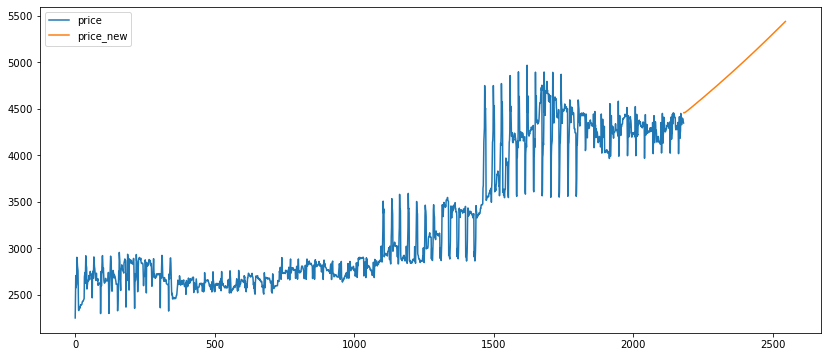

In [120]:
forecasting_plot = full_data[['price','price_new']].reset_index(drop=True).plot(figsize=(14,6))
forecasting_plot
plt.show()

Even ARIMA is not forecasting accurectly so we ll go for LSTM